## For backgroud information please adress the following links:

1) https://www.quantopian.com/posts/alphalens-a-new-tool-for-analyzing-alpha-factors

2) https://www.quantopian.com/tutorials/algorithmic-trading-sentdex#lesson6

3) https://github.com/quantopian/alphalens/blob/master/alphalens/examples/tear_sheet_walk_through.ipynb

## Code for working with the library

In [1]:
# Ignore the goddamn warnings
import warnings
warnings.filterwarnings('ignore')

# Magic
%matplotlib inline

# Libraries in use
import sys
import math
import alphalens
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

In [2]:
# Read the data
df = pd.read_csv("../data/train.csv")

# Create time list with unique names of the timestamp from df and the timeseries
rng = pd.date_range('1/1/2011', periods=len(set(df['TIMESTAMP'])), freq='D')
time_list = list(set(df['TIMESTAMP']))
time_list.sort()

# Map Timestamp values to some FAKE real dates to work after with a helper library
time_dict = {}
for i, ts in enumerate(time_list):
    time_dict[ts] = rng[i]
    
# Create new time stamp column and add it to dataframe
new_time = []
for ts in df['TIMESTAMP']:
    new_time.append(time_dict[ts])
    
# Substitute the column with new time
df['TIMESTAMP'] = new_time

In [3]:
factor = (df.set_index(['TIMESTAMP', 'ID'])).tz_localize('UTC',level = 0)
pricing = (df.pivot(index='TIMESTAMP', columns='ID', values='y')).tz_localize('UTC',level = 0)

In [4]:
# To analyze different factors just change the name of the factor
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor['F02'], 
                                                                   pricing,
                                                                   quantiles=3)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,48.0,25.923678,12.076639,368778,33.964183
2,41.0,74.0,58.428381,8.103782,362614,33.396483
3,68.0,100.0,85.383199,7.599564,354393,32.639335


Returns Analysis


,1,5,10
Ann. alpha,1.141320e+29,-1.000,-1.000
beta,2.860000e-01,-1.197,-0.635
Mean Period Wise Return Top Quantile (bps),1.063068e+03,2380.257,1626.324
Mean Period Wise Return Bottom Quantile (bps),-1.125090e+02,-2521.897,-2607.990
Mean Period Wise Spread (bps),1.161368e+03,154.373,51.940


Information Analysis


,1,5,10
IC Mean,-0.001,0.001,-0.001
IC Std.,0.034,0.033,0.033
t-stat(IC),-0.900,1.322,-0.706
p-value(IC),0.368,0.187,0.480
IC Skew,-0.067,-0.152,-0.087
IC Kurtosis,-0.206,0.236,-0.101
Ann. IR,-0.428,0.629,-0.336


Turnover Analysis


,1,5,10
Quantile 1 Mean Turnover,0.006,0.018,0.032
Quantile 2 Mean Turnover,0.009,0.030,0.054
Quantile 3 Mean Turnover,0.006,0.017,0.030


,1,5,10
Mean Factor Rank Autocorrelation,0.999,0.995,0.99


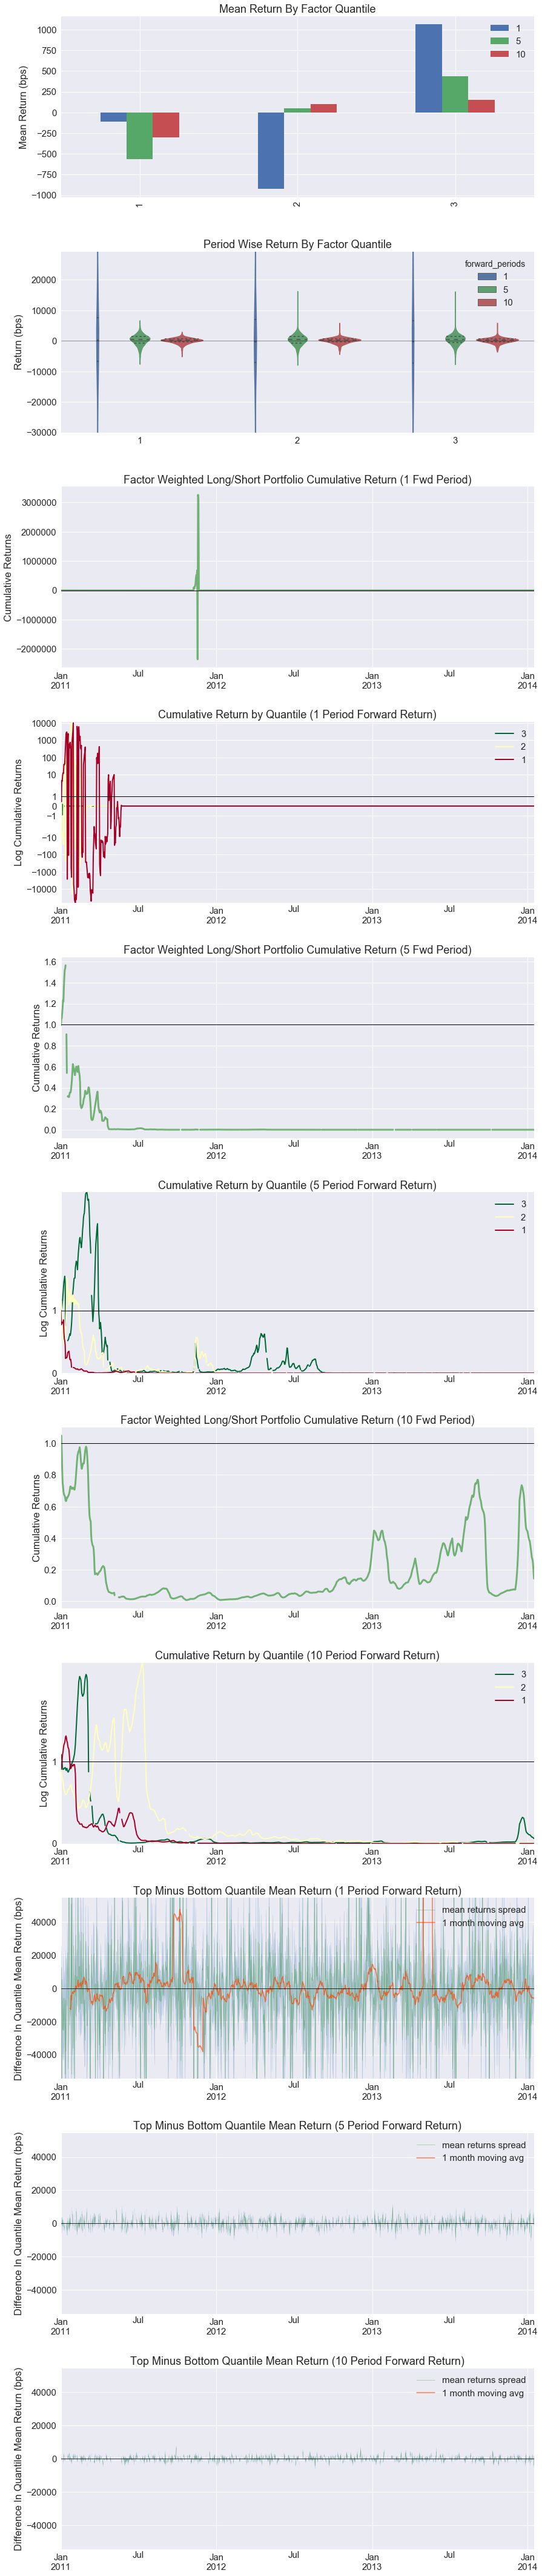

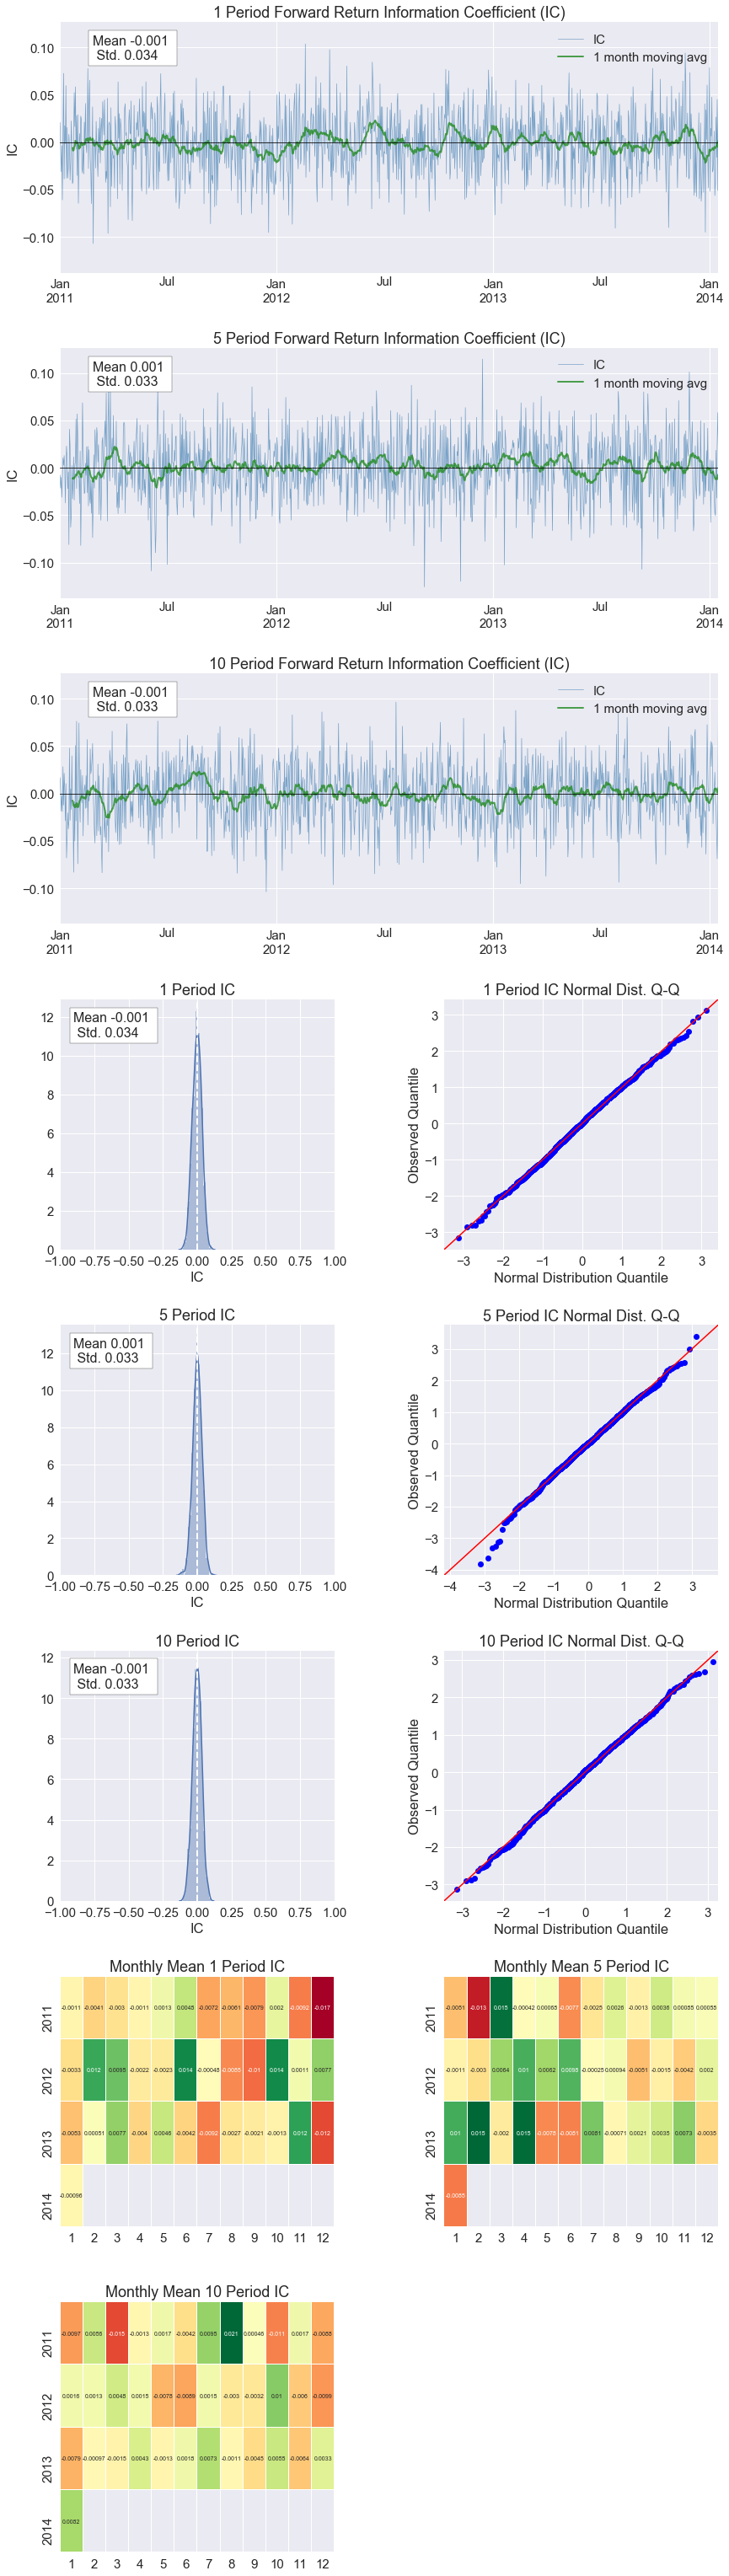

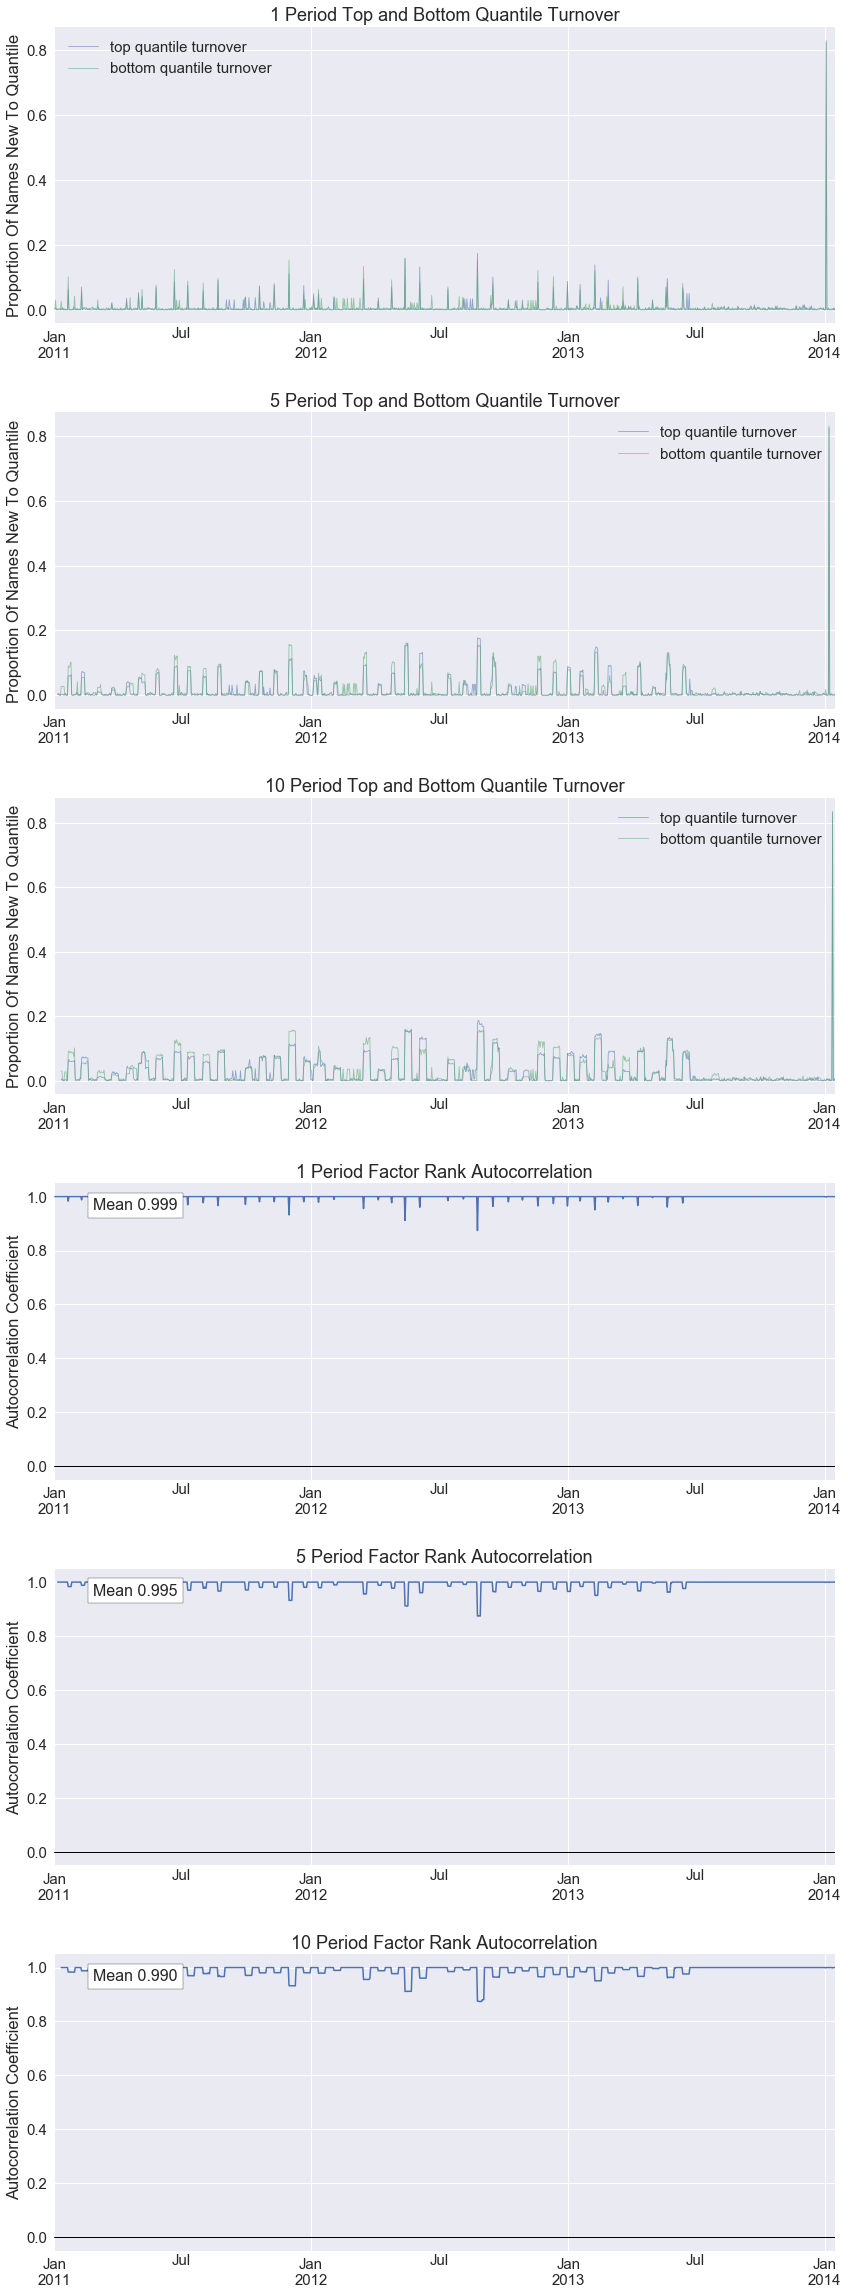

In [5]:
%page
alphalens.tears.create_full_tear_sheet(factor_data)